# Caroline's Boston Pizza Tips

In [1]:
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.multicomp as posthoc
import matplotlib.pyplot as graph

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

In [2]:
# Get data
column_names = ['#', 'Tips', 'Hours', 'Date', '?']
data = pd.read_csv('data/03-16-2016-tipsee-20-06.csv', header=-1)
data.columns = column_names

# Add Tips per hour column
data['Tips per Hour'] = data['Tips'] / data['Hours']

dates = pd.to_datetime(data['Date'])
data['Day'] = pd.to_datetime(data['Date']).dt.dayofweek

# Exploring Data

N =  100
Median Tips $80.5
Average Tips/Hour $15.48/hr
Lowest $15.0 Highest $270.0


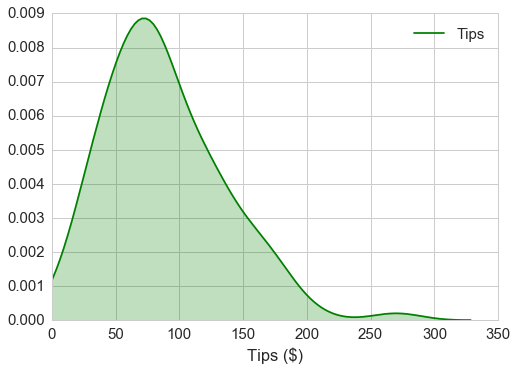

In [3]:
# Tips
sns.kdeplot(data['Tips'], shade=True, color='g')
graph.xlabel('Tips ($)')
graph.xlim([0, 350])
graph.show

print('N = ', len(data))
print('Median Tips ${}'.format(data['Tips'].median()))
print('Average Tips/Hour ${}/hr'.format(round(data['Tips per Hour'].median(), 2)))
print('Lowest ${} Highest ${}'.format(data['Tips'].min(), data['Tips'].max()))

Median Time: 5.0
Max 14.0 Min 1.0


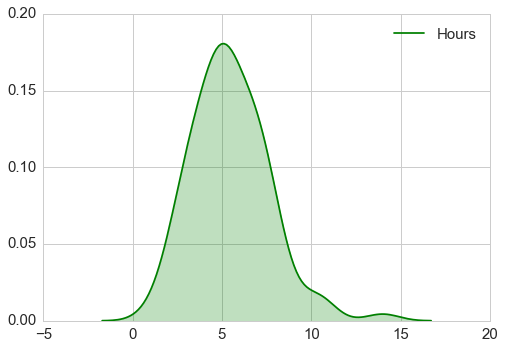

In [4]:
# Time
sns.kdeplot(data['Hours'], shade=True, color='g')

print('Median Time: {}'.format(data['Hours'].median()))
print('Max {} Min {}'.format(data['Hours'].max(), data['Hours'].min()))

# Results

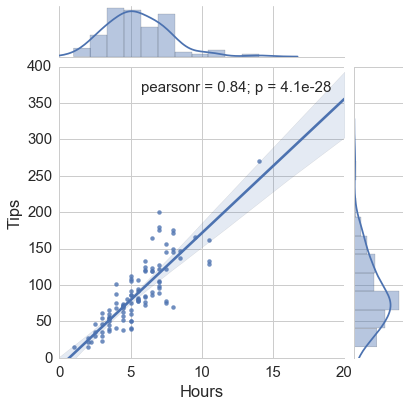

In [5]:
sns.jointplot(
    x='Hours', 
    y='Tips',
    data=pd.DataFrame(data, columns=['Hours', 'Tips']),
    kind='reg',
    robust=True
)
graph.xlim([0, 20])
graph.ylim([0, 400])
graph.show()

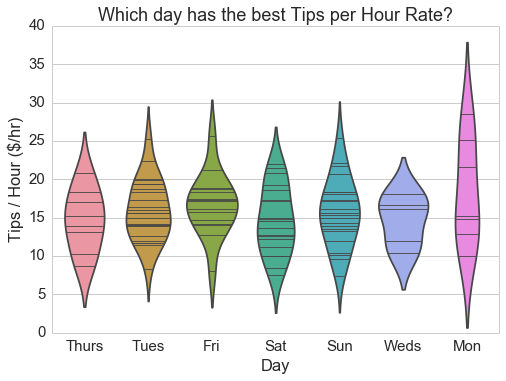

In [6]:
# Which day has the best tips per hour rate?
day_array = {0: 'Mon', 1: 'Tues', 2: 'Weds', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

bar_graph_data = pd.DataFrame(data, columns=['Day', 'Tips per Hour'])
bar_graph_data['Day'] = bar_graph_data['Day'].apply(lambda x: day_array[x])

sns.violinplot(x='Day', y='Tips per Hour', data=bar_graph_data, inner='stick')
graph.title('Which day has the best Tips per Hour Rate?')
graph.ylabel('Tips / Hour ($/hr)')
graph.show()

In [7]:
# Run ANOVA with Post Hoc test to figure which day is significantly different
post_test = posthoc.MultiComparison(data=data['Tips per Hour'], groups=data['Day'])
posthoc_test = post_test.tukeyhsd()
print(posthoc_test)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    -2.3404  -8.0153  3.3344 False 
  0      2    -3.6529  -11.3883 4.0825 False 
  0      3    -3.6197  -10.4569 3.2175 False 
  0      4    -1.6283  -7.6753  4.4188 False 
  0      5    -3.6257  -9.4667  2.2153 False 
  0      6    -2.5933  -8.3261  3.1395 False 
  1      2    -1.3125  -7.8068  5.1819 False 
  1      3    -1.2793  -6.6725  4.114  False 
  1      4     0.7121   -3.636  5.0603 False 
  1      5    -1.2852   -5.342  2.7715 False 
  1      6    -0.2529  -4.1522  3.6465 False 
  2      3     0.0332  -7.4981  7.5645 False 
  2      4     2.0246  -4.7974  8.8466 False 
  2      5     0.0272  -6.6128  6.6673 False 
  2      6     1.0596  -5.4854  7.6047 False 
  3      4     1.9914  -3.7922  7.775  False 
  3      5     -0.006  -5.5738  5.5619 False 
  3      6     1.0264  -4.4278  6.4806 False 
  4      5    -1.9974  -6.560

# Conclusion

Looks like with the data we've got there's no reason to believe that's you make more tips/hour on a particular day.

Fact of the matter is that **70.54%** of the variation is explained by the number of hours worked. So if you want more tips work more... Sooo that was boring.